참고자료 
- https://dacon.io/competitions/official/235862/codeshare/3902?page=1&dtype=recent
- https://dacon.io/competitions/official/235862/codeshare/4121?page=1&dtype=recent

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
df_train = pd.read_csv('data/penguin/train.csv')
df_test = pd.read_csv('data/penguin/test.csv')

### train.csv : 학습 데이터
- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
- Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

In [2]:
df_train.shape, df_test.shape

((114, 11), (228, 10))

In [3]:
# id 는 제외하고 분석합니다.
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

# 데이터를 확인합니다.
df_train.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [4]:
# 데이터 확인 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


### 결측치 확인

In [5]:
# 결측치 확인하기 
df_train.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

In [6]:
df_test.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

In [7]:
# 결측치가 있는 row들을 확인합니다.
df_train[df_train.isna().sum(axis=1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [8]:
# 결측치가 있는 row들을 확인합니다.
df_test[df_test.isna().sum(axis=1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
27,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191,MALE,NaN,NaN
46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186,NaN,8.63243,-25.21315
75,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.9,19.5,206,MALE,NaN,-23.78767
81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179,NaN,NaN,NaN
98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216,NaN,8.25818,-26.23886
106,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222,MALE,NaN,NaN
152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217,NaN,8.04111,-26.18444
159,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182,FEMALE,NaN,NaN
175,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195,MALE,NaN,NaN
202,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181,MALE,NaN,NaN


### 기초 통계 분석

In [9]:
# 기초 통계량 확인 
df_train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [10]:
# 데이터 타입 확인 
df_train.dtypes

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [11]:
# 범주형 ,연속형 데이터 나눠주기 

categorical_feature = ['Species','Island','Clutch Completion','Sex']
numerical_feature= ['Culmen Depth (mm)','Culmen Length (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

### 수치형 데이터 시각화 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

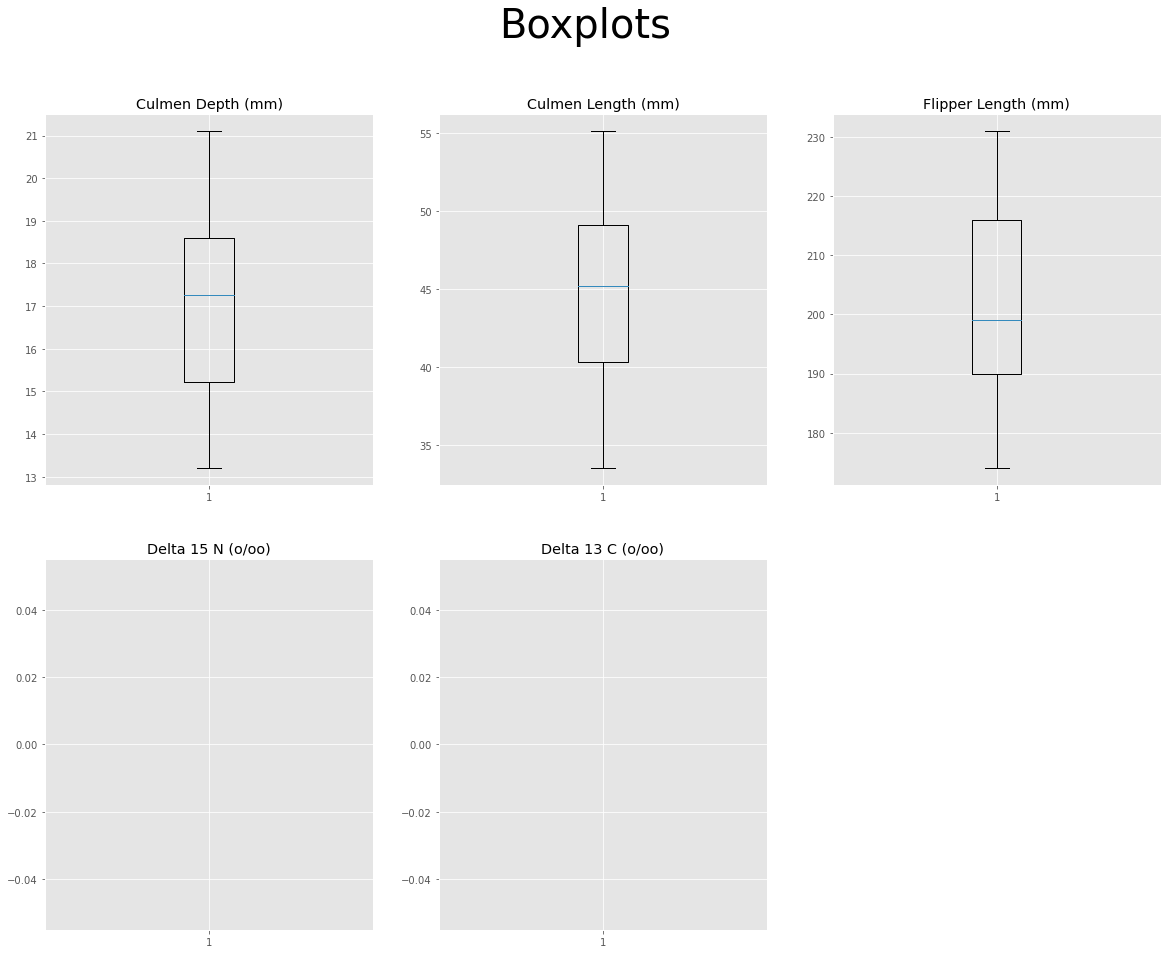

In [13]:
feature = numerical_feature

# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.title(feature[i])
    plt.boxplot(df_train[feature[i]])
plt.show()

# 특이사항이 없음 

Culmen Depth (mm)


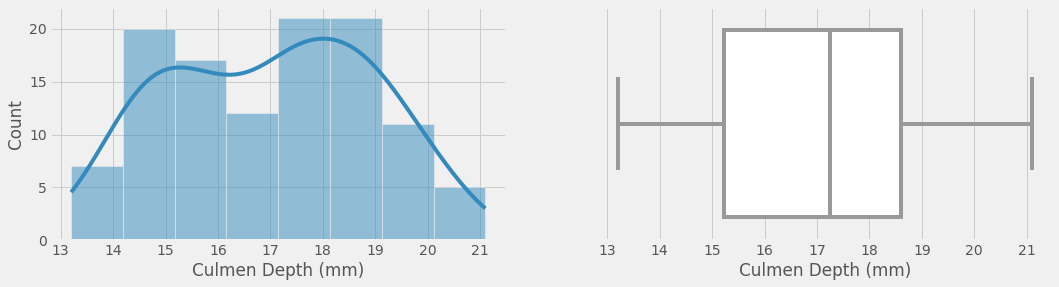

<Figure size 1080x360 with 0 Axes>

Culmen Length (mm)


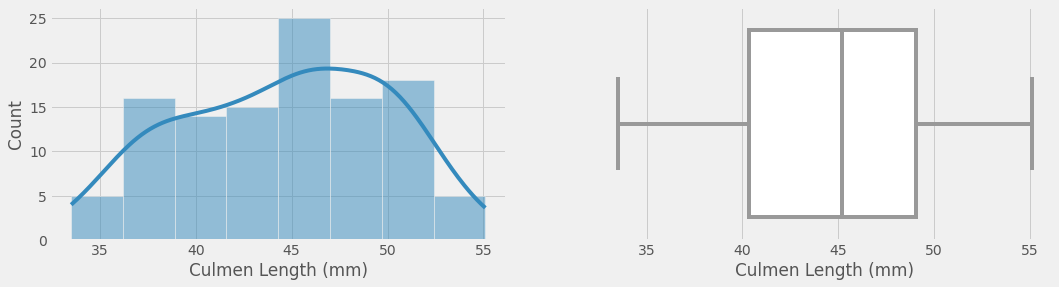

<Figure size 1080x360 with 0 Axes>

Flipper Length (mm)


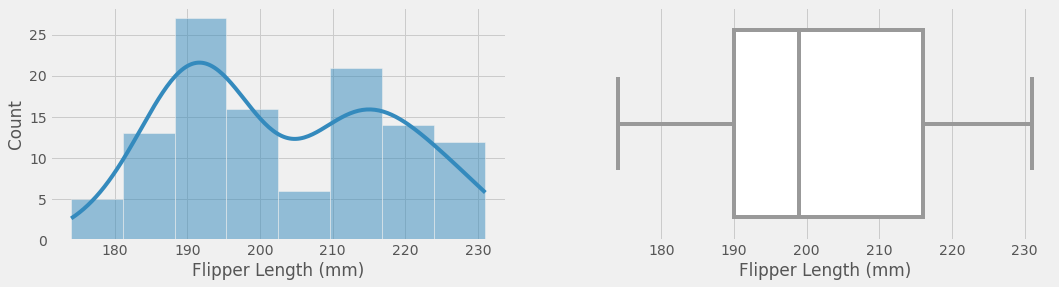

<Figure size 1080x360 with 0 Axes>

Delta 15 N (o/oo)


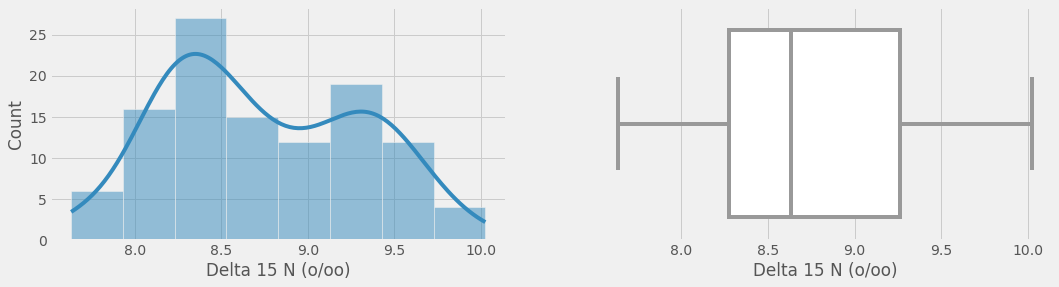

<Figure size 1080x360 with 0 Axes>

Delta 13 C (o/oo)


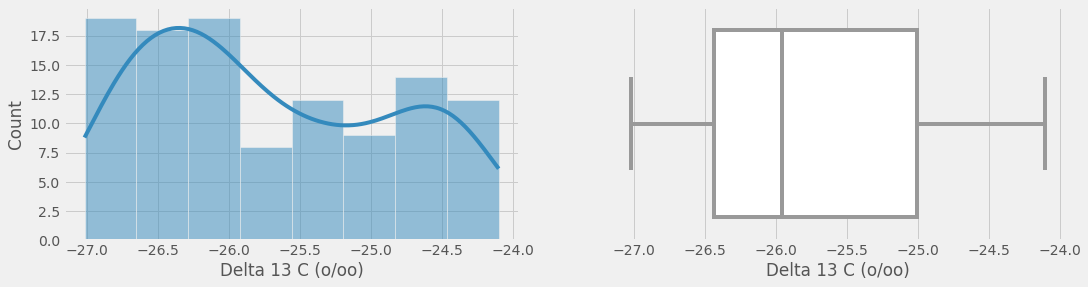

<Figure size 1080x360 with 0 Axes>

In [14]:
plt.style.use('fivethirtyeight')

for _ in numerical_feature:
    print(_)
    f,ax = plt.subplots(1,2,figsize=(16,4))
    plt.figure(figsize=(15,5))
    sns.histplot(x=df_train[_], ax=ax[0], kde=True)
    sns.boxplot(x=df_train[_], ax=ax[1], color='white')
    plt.show()

Body Mass (g)


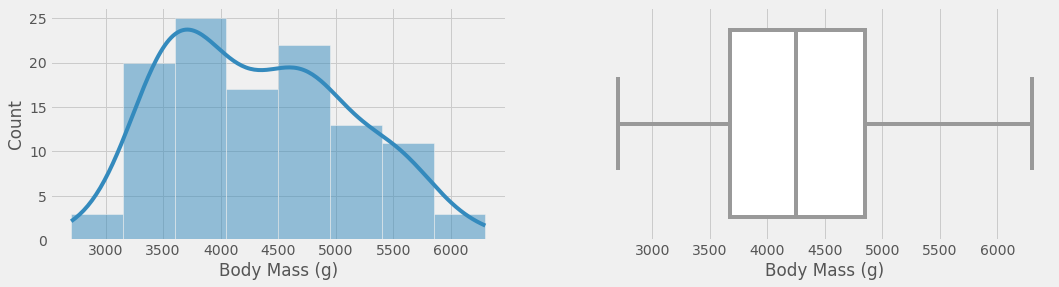

<Figure size 1080x360 with 0 Axes>

In [15]:
# target 분포 확인 

plt.style.use('fivethirtyeight')

print("Body Mass (g)")
f,ax = plt.subplots(1,2,figsize=(16,4))
plt.figure(figsize=(15,5))
sns.histplot(x=df_train['Body Mass (g)'], ax=ax[0], kde=True)
sns.boxplot(x=df_train['Body Mass (g)'], ax=ax[1], color='white')
plt.show()

### 카테고리형 데이터 시각화

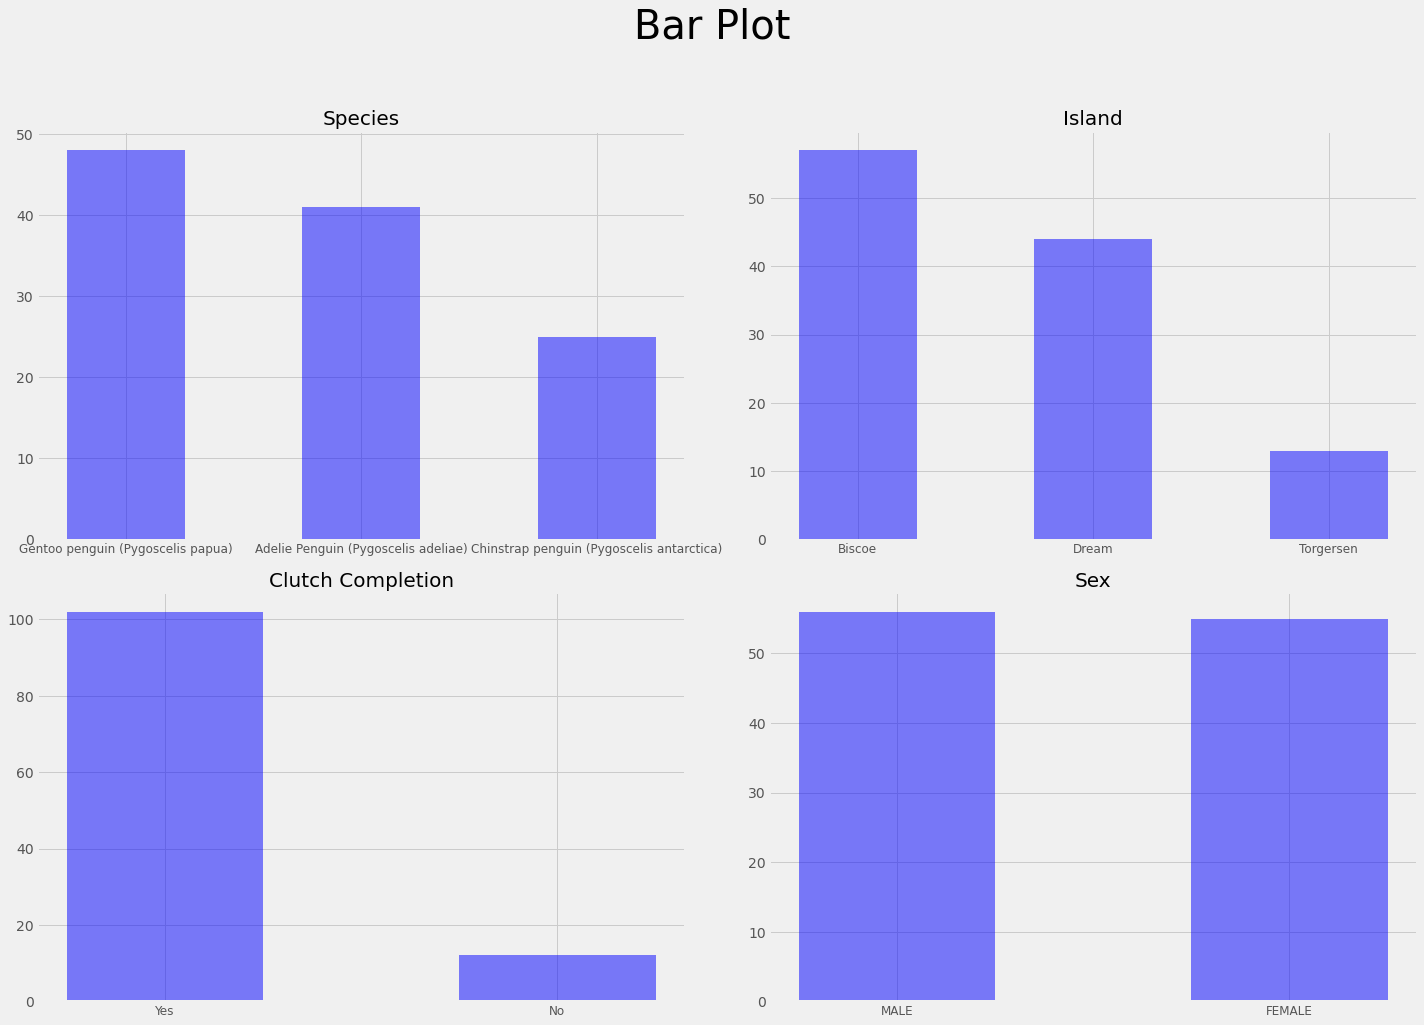

In [16]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.title(feature[i], fontsize=20)
    temp = df_train[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 시각화 결과분석 🐧
# Species : Gentoo penguin이 가장 많음
# Island : Biscore가 가장 많음
# Clutch Completetion : Yes가 많음 (= data imbalance가 심함)
# Sex : 두 카테고리 모두 동일한 비율을 보임

Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64


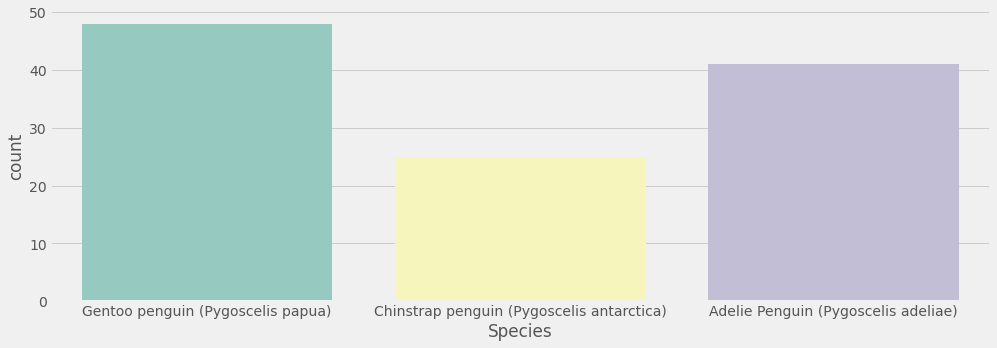

Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64


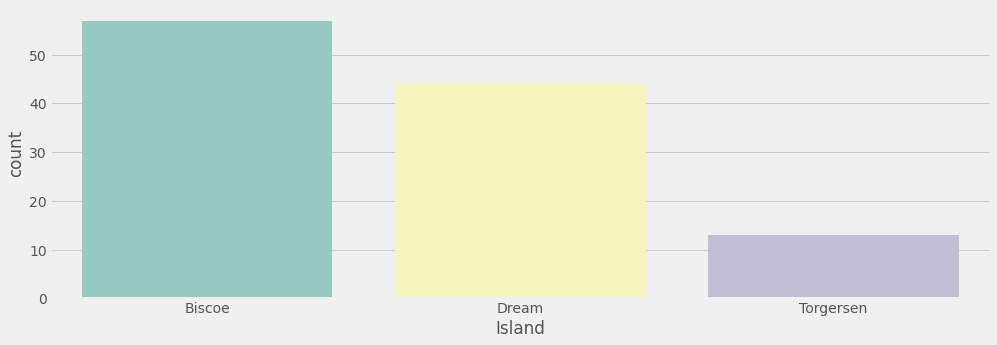

Clutch Completion
Yes    102
No      12
Name: Clutch Completion, dtype: int64


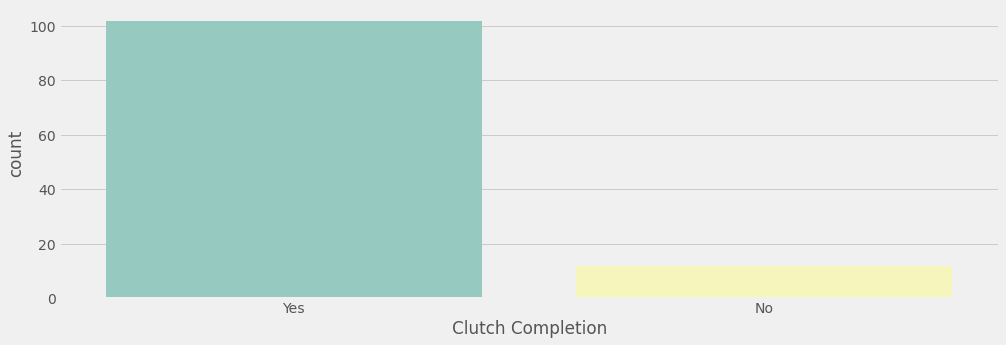

Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64


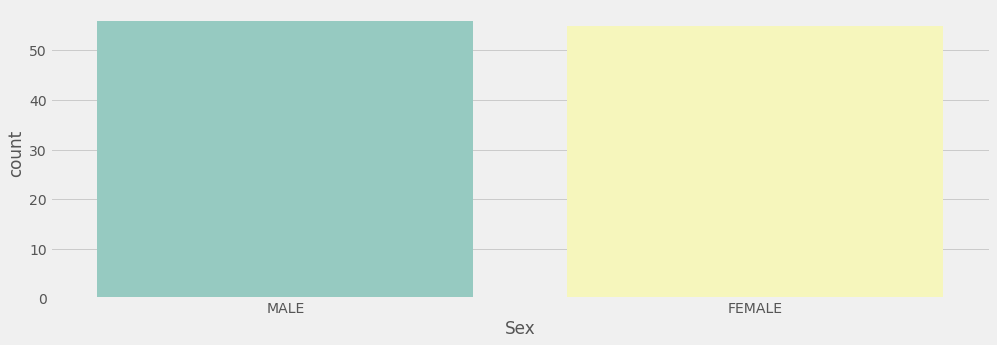

In [17]:
# 카테고리형 범주 하나씩 
for _ in categorical_feature:
    print(_)
    print(df_train[_].value_counts())
    plt.figure(figsize=(15,5))
    sns.countplot(x=df_train[_],palette='Set3')
    plt.show()

### 상관관계 시각화

In [18]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = df_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

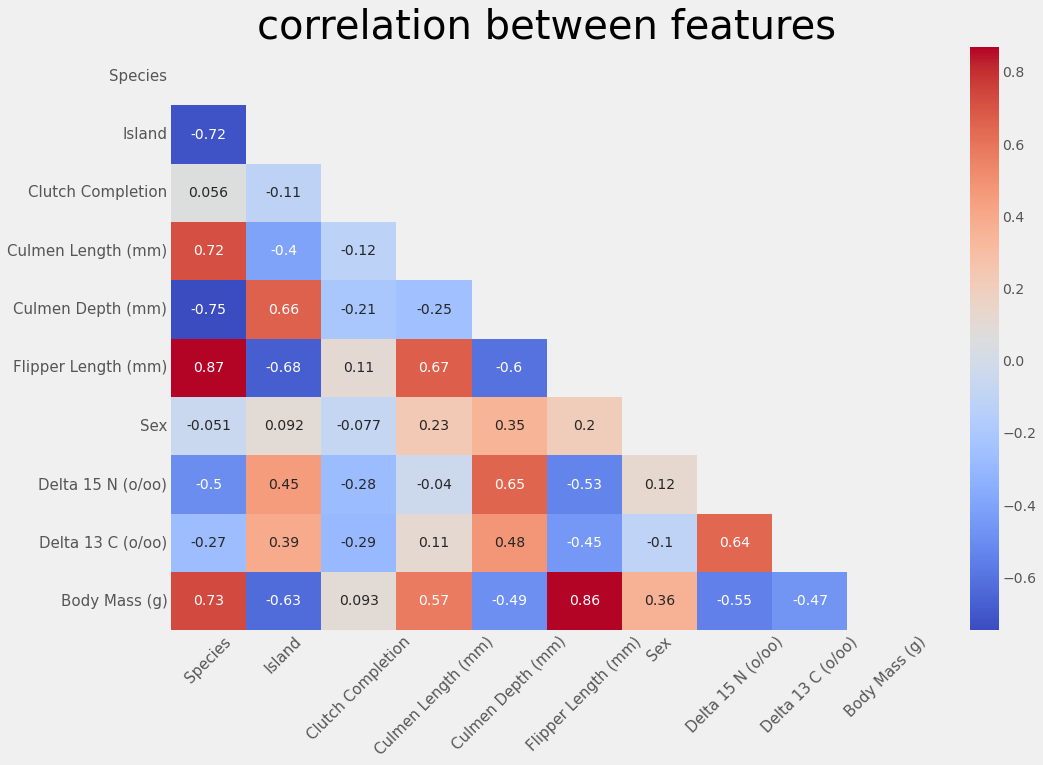

In [19]:
# 상관관계 분석도 

plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table) # 어떤 변수만큼의 사이즈인 0 으로 가득 찬 Array를 배출한다.
mask[np.triu_indices_from(mask)]= True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()


# target feature인 Body Mass (g) 는 Flipper Length (mm)와 가장 높은 상관(0.87)
# Species, Island, Culmen Length (mm), Delta 15 N (o/oo) 와도 높은 상관을 보임

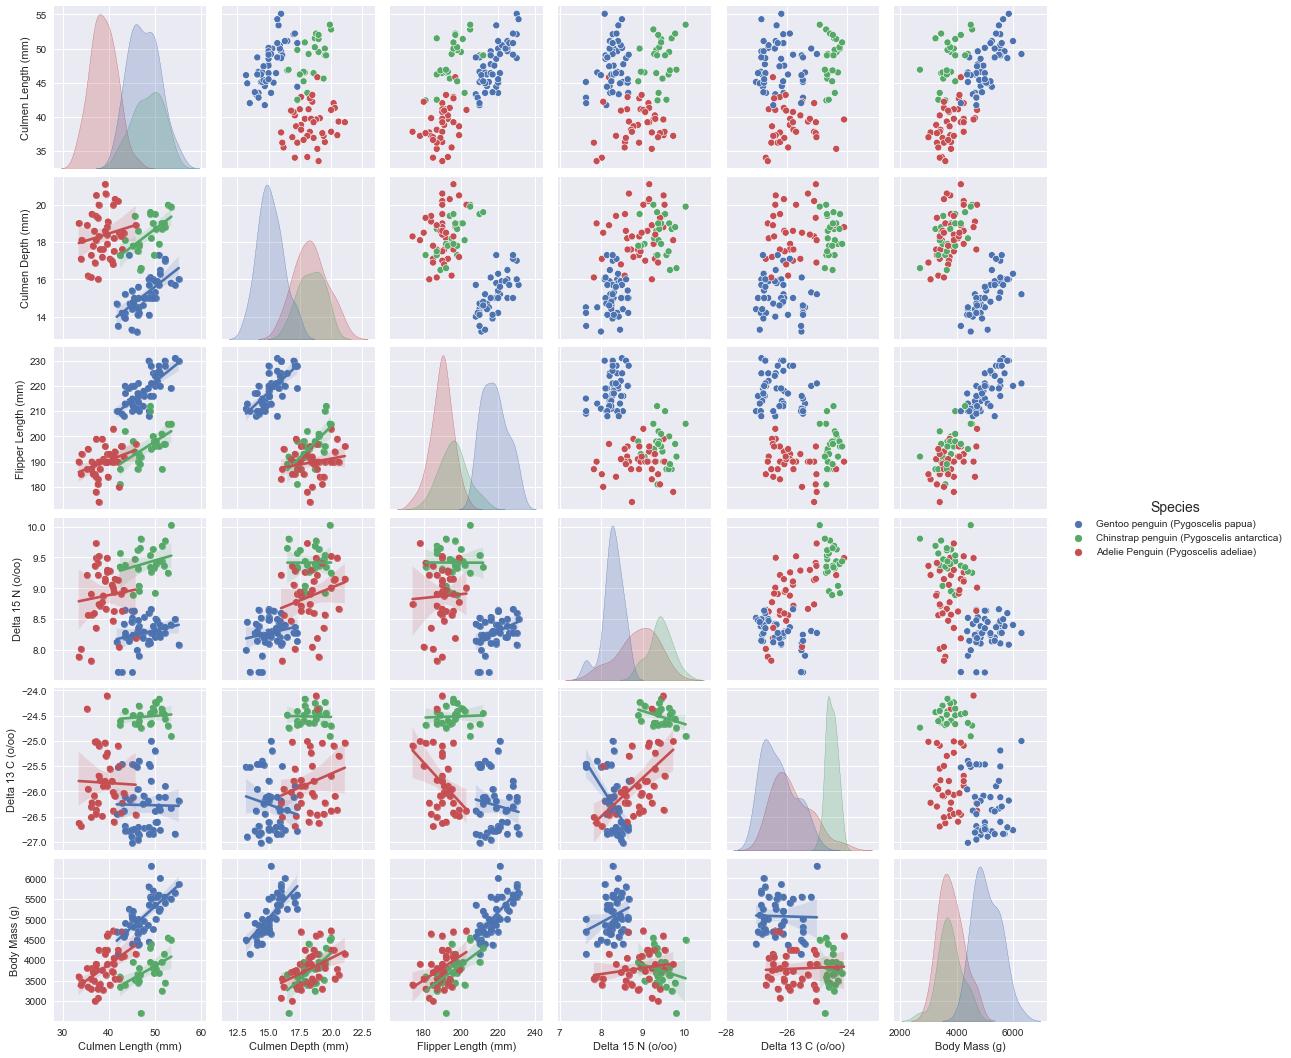

In [20]:
plt.style.use('seaborn')
g= sns.pairplot(df_train,hue='Species')
g.map_lower(sns.regplot);

In [21]:
target = "Body Mass (g)"

#### target 과 수치형 feature의 관계 

In [22]:
# 경고무시 
import warnings
warnings.filterwarnings("ignore")

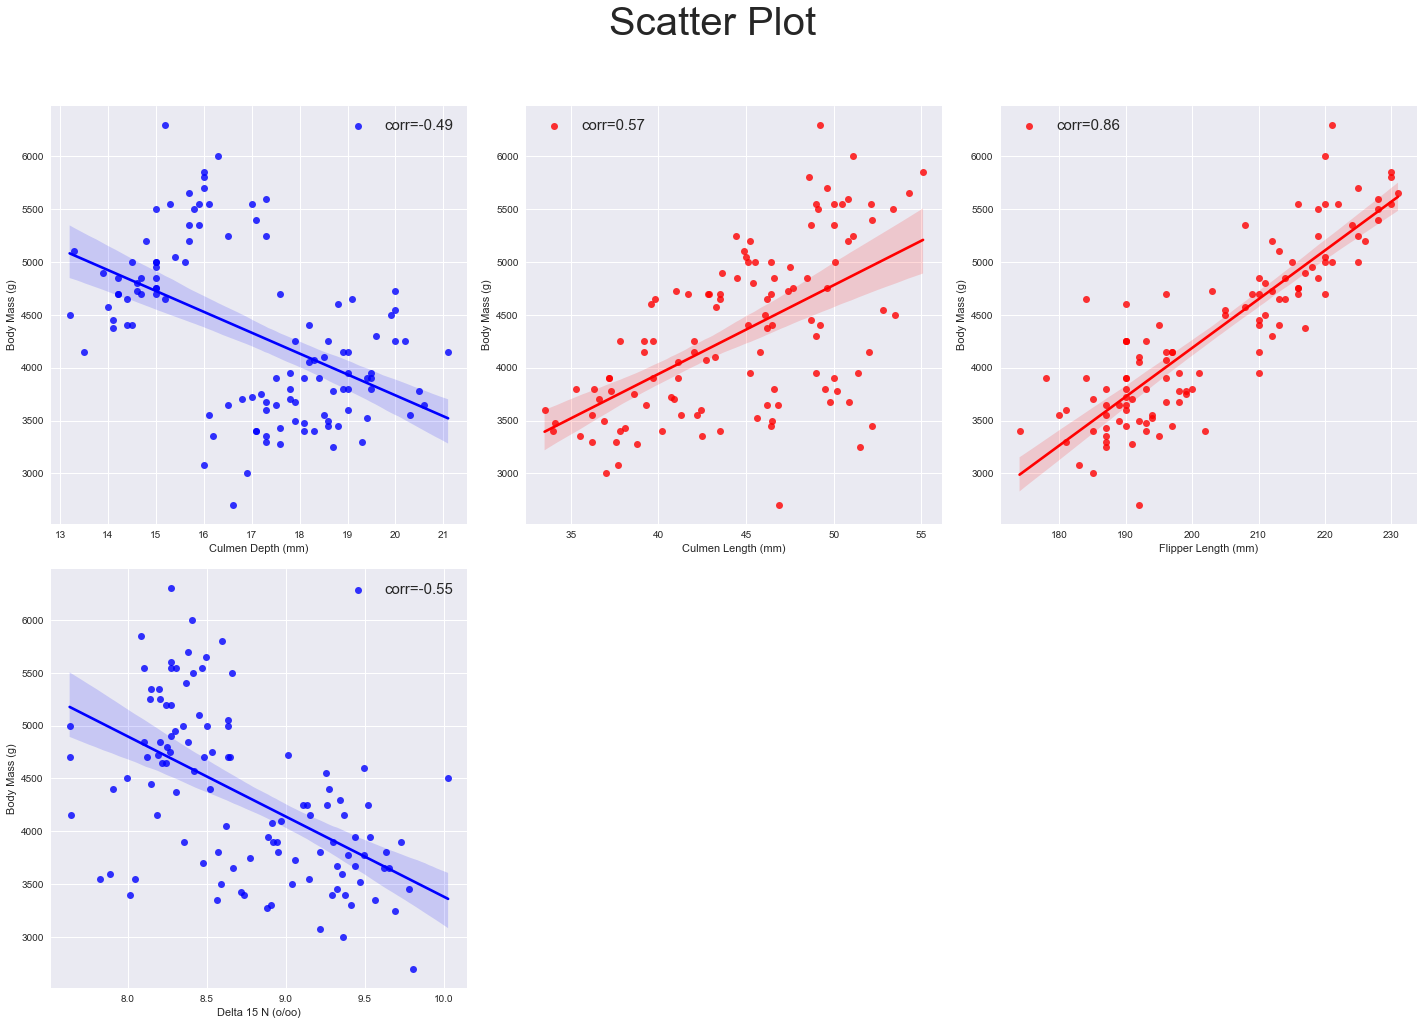

In [23]:
feature = numerical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize = 40)

for i in range(len(feature[:-1])):
    plt.subplot(2,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = df_train[[feature[i],target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    sns.regplot(df_train[feature[i]],df_train[target], color=c, label=f"corr={corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### target과 카테고리형 feature의 관계

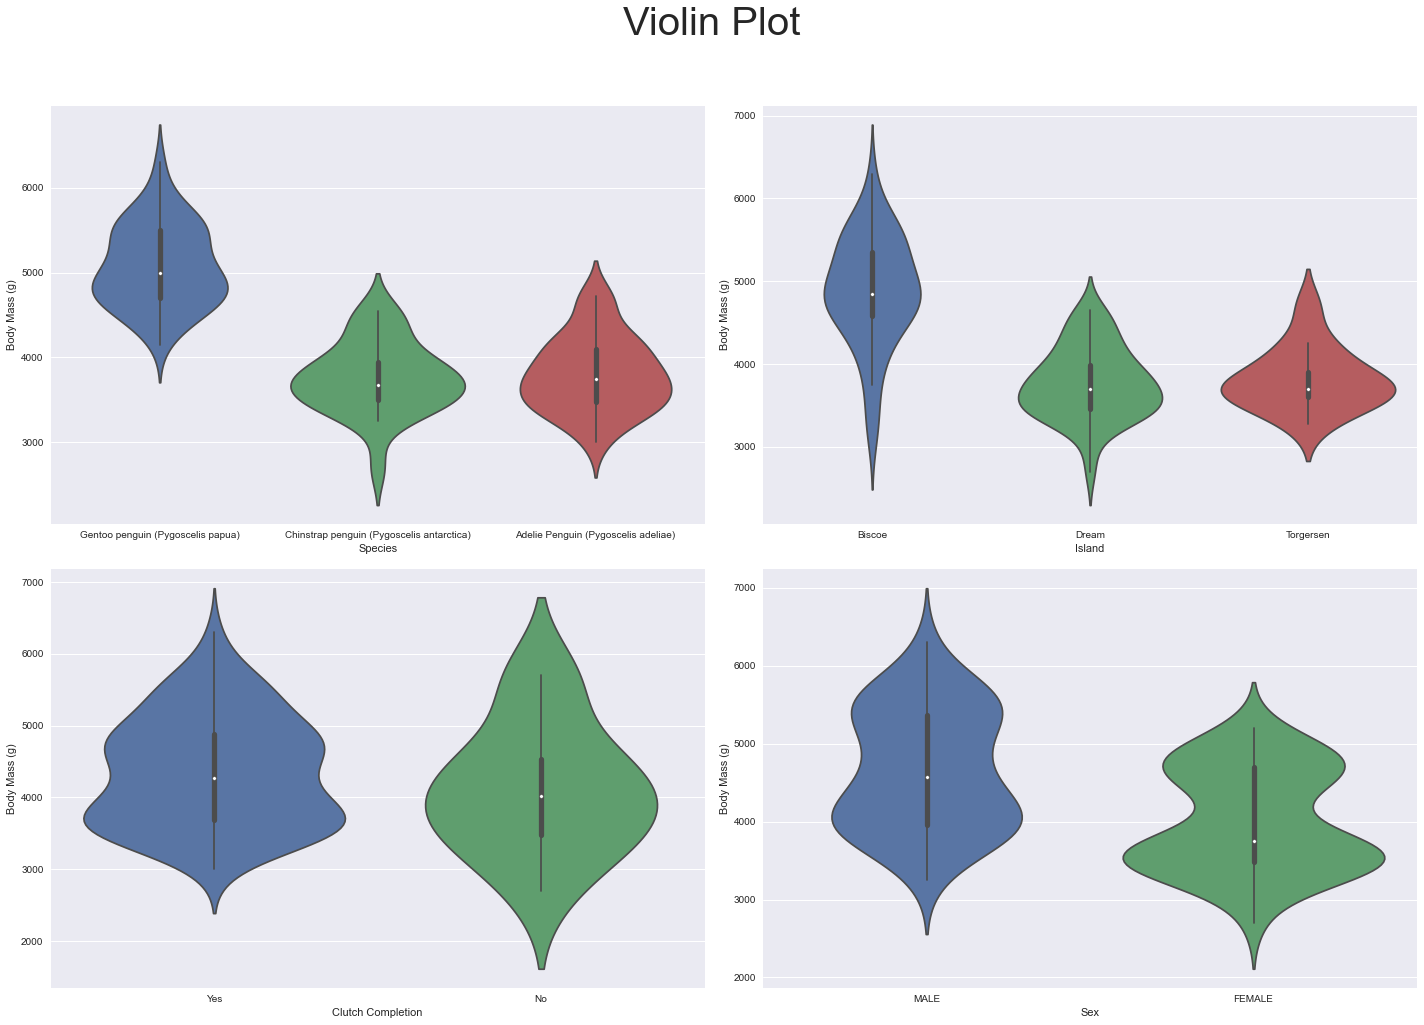

In [24]:
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외, violinplot 
for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= df_train[feature[i]], y= df_train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Preprocessing

In [25]:
# 결측치 처리 
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

# 이산형 변수(numerical)을 one-hot encoding 
train = pd.get_dummies(df_train)
test = pd.get_dummies(df_test)

print(train.shape)
print(test.shape)

(114, 16)
(228, 15)


#### Modeling

In [26]:
#Standard Scaler
#변수간 스케일을 맞춰주기 위해 StandardScaler를 사용

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

train_scaler=ss.fit_transform(train[numerical_feature])
train[numerical_feature] = pd.DataFrame(data=train_scaler, columns=numerical_feature)

test_scaler= ss.transform(test[numerical_feature])
test[numerical_feature] = pd.DataFrame(data=test_scaler, columns=numerical_feature)

In [27]:
# 데이터 확인 

train[numerical_feature].head()

,Culmen Depth (mm),Culmen Length (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,-0.887255,1.016685,1.161653,-0.775548,0.630951
1,1.027037,0.922318,-0.209242,1.601553,1.629486
2,-1.352893,0.091884,0.476205,-0.391149,-1.533908
3,-1.197680,-0.021357,0.750384,-0.962206,-0.523568
4,-0.525091,0.941191,1.504376,-0.635514,-1.325731


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,BayesianRidge

In [29]:
# train, test 나누기 (Validation)

X=train.drop(['Body Mass (g)'],axis=1)
y= train['Body Mass (g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.01,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 339.5967
alpha 값  0.01 일때 평균 rmse : 339.3464
alpha 값  0.1 일때 평균 rmse : 337.4481
alpha 값  1 일때 평균 rmse : 330.4727
alpha 값  10 일때 평균 rmse : 329.2807
alpha 값  100 일때 평균 rmse : 405.4389


In [31]:
#Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
pred= ridge.predict(X_test)
print(ridge.score(X_test,y_test))

0.8242200622853957


#### Evaluation

In [32]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(y_test,pred)

316.0013886254281

#### 다른 방법

In [ ]:
# 결측치  column 추출 하는 함수 

def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

In [ ]:
# 결측치 확인 
missing_col = check_missing_col(df_train)

In [ ]:
# 결측치 처리하는 함수 (카테고리형 데이터 행 삭제, 수치형 데이터는 평균값)
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채워주었습니다.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp


df_train = handle_na(df_train, missing_col)

In [ ]:
# 수치형 과 카테고리형 분리 
numeric_feature = df_train.columns[(df_train.dtypes==int) | (df_train.dtypes== float)]
categorical_feature = df_train.columns[df_train.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))